Nous n'aurions pas dû utiliser les mêmes données pour entrainer et évaluer le modèle

Nous devons décomposer nos données en deux groupes:
* les données d'entrainement
* les données de test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# De nouvelles données

Il existe de très nombreux datasets pour jouer ou s'entrainer.

Nous allons ici en sélectionner sur [UCI - Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) et en particulier, j'ai été attiré par:
* [https://archive.ics.uci.edu/ml/datasets/Wine+Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [https://archive.ics.uci.edu/ml/datasets/Leaf](https://archive.ics.uci.edu/ml/datasets/Leaf)

In [2]:
wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

In [3]:
wines.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

Il y a visiblement un problème...

In [4]:
# Le séparateur de ce dataset n'est pas le classique ','
wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
# wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [5]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


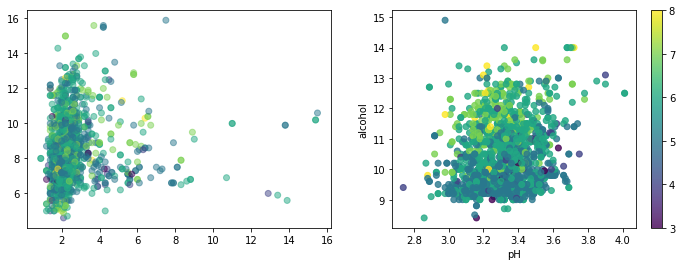

In [7]:
# Première visualisation rapide
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(wines['residual sugar'], wines['fixed acidity'], c=wines['quality'], alpha=0.5)
plt.subplot(122)
plt.scatter(wines['pH'], wines['alcohol'], c=wines['quality'], alpha=0.8)
plt.xlabel("pH")
plt.ylabel("alcohol")
plt.colorbar()

In [8]:
wines['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Le découpage Train/Test/Predict
Il n'est pas bon d'entrainer un modèle puis de l'évaluer sur le même dataset.

La première bonne pratique est de le décomposer en au moins 2 datasets : train + test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = wines['quality']
X = wines.drop(columns=['quality'])

Pour une manipulation plus générique, on va renommer numériquement les colonnes

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# pour plus de reproductibilité on fixe la graine du générateur aléatoire

In [12]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1279, 11)
Test set: (320, 11)


Text(0.5, 1.0, 'Test set')

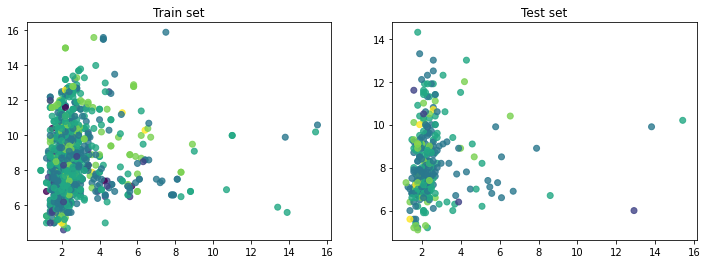

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train['residual sugar'], X_train['fixed acidity'], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test['residual sugar'], X_test['fixed acidity'],c=y_test, alpha=0.8)
plt.title('Test set')

Même distribution. Le tirage aléatoire pour constuire les *train* et *test* sets doit aider à présever les représentativités.

# Passons à l'entrainement

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier(n_neighbors=1) # Hyper-paramètre magique ?

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.61875


Si je cherche à optimiser mes hyper-paramètres pour améliorer mon `test score`, je suis en train d'intégrer, en quelque sorte, le `test score` et les données qui le constituent dans mon entrainement.

Il ne faut pas biaiser mon entrainement avec le *test set*; il me faut extraire de mon *train set*, un *validation set* qui sert à l'optimisation des hyper-paramètres.

Mais comment définir mon *train set* et *validation set* tout en évitant de biaiser mon entrainement sur un *validation set* particulier ?

Pour cela, on va utiliser la *cross-validation*

## Cross-validation à la rescousse

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Calcul du score des différents splits
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([0.5078125 , 0.50390625, 0.5       , 0.52734375, 0.48235294])

In [18]:
# ce qui donne en moyenne
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.5042830882352941

et pourquoi `scoring='accuracy'` ?

il y en a plein d'autres à expérimenter ici: [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [19]:
try:
    cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='help')
except Exception as e:
    print(f"{e}")

'help' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.


In [20]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [21]:
for metric in ['neg_mean_absolute_error','neg_mean_squared_error','neg_median_absolute_error']:
    score = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring=metric).mean()
    print(f"metric: {metric} => score = {score}", )

metric: neg_mean_absolute_error => score = -0.5879534313725491
metric: neg_mean_squared_error => score = -0.7989889705882354
metric: neg_median_absolute_error => score = -0.3


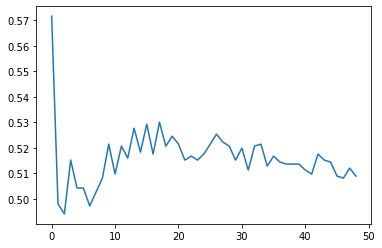

In [22]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

Pour un utilisateur de scikit-learn, ceci est encore trop de code 😅

In [23]:
from sklearn.model_selection import validation_curve

In [24]:
model = KNeighborsClassifier()
k = np.arange(1, 11) # de 1 à 10 inclus

train_score, val_score = validation_curve(model, X_train, y_train,
                                          param_name='n_neighbors', param_range=k, cv=5)
                                          # param_name='n_neighbors' décrit le paramètre
                                          # à faire varier dans le modèle (voir doc du modèle)

In [25]:
val_score # tous les résultats sont là

array([[0.546875  , 0.546875  , 0.55078125, 0.6171875 , 0.59607843],
       [0.453125  , 0.48828125, 0.49609375, 0.5234375 , 0.52941176],
       [0.4453125 , 0.484375  , 0.484375  , 0.53125   , 0.5254902 ],
       [0.49609375, 0.54296875, 0.48046875, 0.54296875, 0.51372549],
       [0.5078125 , 0.50390625, 0.5       , 0.52734375, 0.48235294],
       [0.51171875, 0.48828125, 0.48828125, 0.55078125, 0.48235294],
       [0.48828125, 0.50390625, 0.484375  , 0.51171875, 0.49803922],
       [0.51953125, 0.50390625, 0.48046875, 0.52734375, 0.48235294],
       [0.53125   , 0.51953125, 0.484375  , 0.5234375 , 0.48235294],
       [0.54296875, 0.546875  , 0.484375  , 0.5390625 , 0.49411765]])

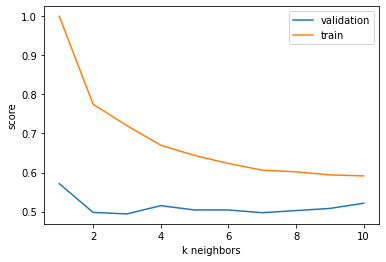

In [26]:
# un peu plot de la moyenne pour essayer de se rendre compte
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('k neighbors')
plt.legend()

## Mais moi, j'aimerais bien explorer <u>tous</u> les autres hyper-paramètres
### (subtilité, quand tu nous tiens)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'n_neighbors': np.arange(1, 10),
              'metric': ['euclidean', 'manhattan','minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'weights':['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.6145496323529411
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [30]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.640625

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
m = confusion_matrix(y_test, model.predict(X_test))
m
# indices ligne : vraies données
# indices colonnes : données prédites

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   2,   4,   0,   0],
       [  0,   1, 120,  31,   0,   0],
       [  0,   0,  39,  70,   6,   0],
       [  0,   0,   4,  22,  14,   0],
       [  0,   0,   2,   3,   0,   1]])

i.e. 188 vins de qualité classe 2 ont bien été classés en qualité classe 2 et 89 vins de qualité classe 2 ont été classées en qualité classe 3.

ATTENTION: ce sont des indices de classes et non la qualité en elle-même !!

(array([  1.,   0.,   6.,   0., 152.,   0., 115.,   0.,  40.,   6.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

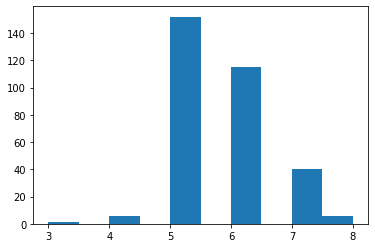

In [33]:
# en effet, chaque qualité n'est pas forcément liée à une classe
plt.hist(y_test)

In [34]:
np.diag(m)

array([  0,   0, 120,  70,  14,   1])

In [35]:
sum(np.diag(m))/len(y_test) # on retrouve le score donné par grid.predict

0.640625

# Comment expliquer que mon modèle est vraiment *nul* sur ses données ?

In [36]:
from sklearn.model_selection import learning_curve

[ 102  204  306  409  511  613  716  818  920 1023]


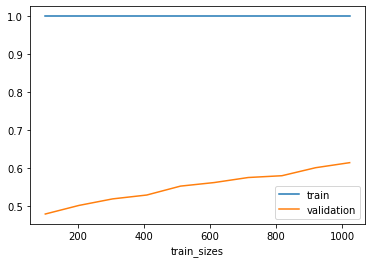

In [37]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
                                           # train_sizes représente le % de données à utiliser pour modéliser
                                           # l'entrainement
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Quelle conclusion ?

**ON MANQUE DE DONNÉES !!**

In [38]:
red_wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white_wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [39]:
all_wines = pd.concat([red_wines, white_wines])

In [40]:
all_wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Et hop, on retente avec tout ça, pour voir.

In [41]:
# wines = all_wines # et hop, on reprend tout en haut

...

Bah non, faut essayer autre chose.

C'était trop dur par rapport aux données disponibles